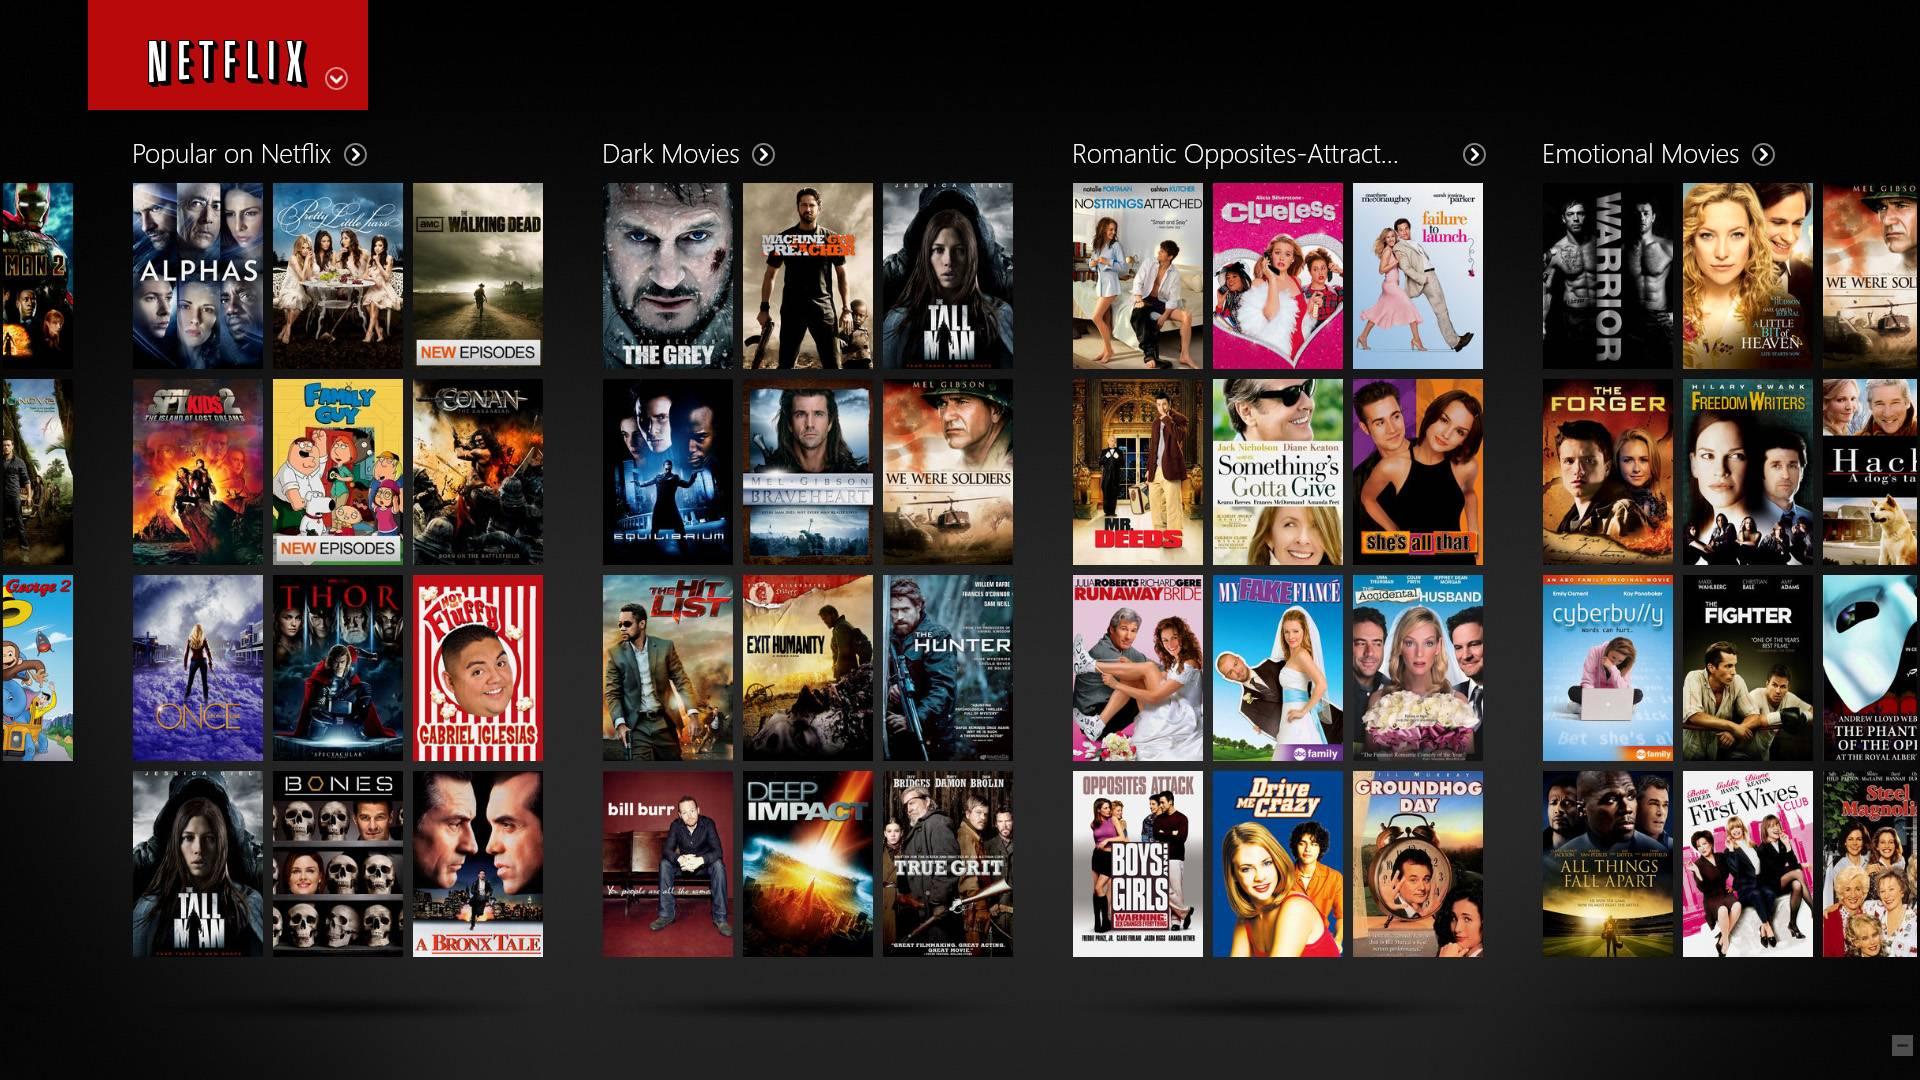

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


<h2> 1. Defining Problem Statement and Analysing the basic metrics

<h3> 1.1 Problem Statement:</h3><br>

We have given the netflix data and we need to preprocess it in such a way so that we could solve the business problems. Our analysis could help the managers to take better business decisions.
If we carefully observe the data then we are having the following problems:<br>

a) We have columns that are having nested values and we must seperate the nested values to solve the business problem.<br><br>
b) If we have some missing values then we need to handle such values.<br><br>
c) We need to modify our data as per the business metric and what problem we are solving.<br>

<h3> 1.2 Business Metric:</h3><br>
 Business Metric for the Netflix given this data can be the following:<br><br>
a) Average run time of the movies?<br><br>
b) In which month the movies are released more?<br><br>
c) Which genre have the most number of movies? etc..<br>

<h4>Note: We can answer the above business problems using our data.

<h2> 2. Observations about the data:

In [4]:
# shape of the data
print('The shape of the data is -',df.shape)

The shape of the data is - (8807, 12)


In [5]:
# data types and info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [6]:
print(df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


### Observation
1. The below columns are having the null values:<br>
    a) director<br>
    b) cast<br>
    c) country<br>
    d) date_added<br>
    e) rating<br>
    f) duration<br>

In [7]:
print('The total null values in director column : ',sum(df['director'].isnull()))
print('The total null values in cast column : ',sum(df['cast'].isnull()))
print('The total null values in country column : ',sum(df['country'].isnull()))
print('The total null values in date_added column : ',sum(df['date_added'].isnull()))
print('The total null values in rating column : ',sum(df['rating'].isnull()))
print('The total null values in duration column : ',sum(df['duration'].isnull()))

The total null values in director column :  2634
The total null values in cast column :  825
The total null values in country column :  831
The total null values in date_added column :  10
The total null values in rating column :  4
The total null values in duration column :  3


### Note:
1. The director column have most null values (2634), Now if we decide to drop these number of rows then we will lost about 30% of our data (2634/8807).<br>
2. The data is huge so we will not remove it.
3. Statistical summary makes less sense cause the only numerical column we have is release_year and the below is the statistical summary of it

#### Filling up date nan values

In [8]:
df['director'].fillna('director_null',inplace=True)
df['cast'].fillna('cast_null',inplace=True)
df['country'].fillna('country_null',inplace=True)
df['date_added'].fillna('date_added_null',inplace=True)
df['rating'].fillna('rating_null',inplace=True)
df['duration'].fillna('duration_null',inplace=True)

In [9]:
print(df.isnull().any())

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool


### Observation:
We dont have any null values now an we can do melting 

In [10]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1768,18,221,514,8775
top,s1,Movie,Dick Johnson Is Dead,director_null,cast_null,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,3207,1793,362,4


## Preprocessing the data:

### The following columns are having the nested values:

1. Duration - Removing the min and season from it
1. Director
2. Cast
3. Country

#### NOTE: 
1. We will transform this data into individual values and will use split(by comma).
2. When seperate the data using splitting then we will have lot of NAN values row wise and that will be a problem.
3. To solve the NAN values problem, we will use melting to convert our data into long format

### 1. Preprocessing the duration column : 
We are removing the min and season using split by space

In [11]:
df_split_duration = df['duration'].str.split(' ', expand=True)
df.drop('duration',axis=1).head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director_null,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [12]:
# dropping the col having index=1
df_split_duration = df_split_duration.drop(df_split_duration.columns[[1]],axis=1)
df = df.drop('duration',axis=1)
df = pd.concat([df,df_split_duration],axis=1)
df.columns.values[-1] = 'duration'

In [13]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,director_null,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2


### 2. Preprocessing the 'director' column

In [14]:
print(df['director'].head())

0    Kirsten Johnson
1      director_null
2    Julien Leclercq
3      director_null
4      director_null
Name: director, dtype: object


In [15]:
# step 1 : splitting the comma seperated data 
df_split_director = df['director'].str.split(',', expand=True)
df_split_director.columns = ['director '+str(i) for i in df_split_director.columns] # renaning the columns
df_split_director.head(2)

,director 0,director 1,director 2,director 3,director 4,director 5,director 6,director 7,director 8,director 9,director 10,director 11,director 12
0,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
1,director_null,None,None,None,None,None,None,None,None,None,None,None,None


In [16]:
# step 2: Dropping the director col from original df
df_drop_director = df.drop(['director'],axis=1)
df_drop_director.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,listed_in,description,duration
0,s1,Movie,Dick Johnson Is Dead,cast_null,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2


In [17]:
# step 3: Combining our splitted data with original data:

combined_data = pd.concat([df_drop_director,df_split_director],axis=1)
director_df = pd.melt(combined_data,id_vars=['show_id','type','cast','title','country',
                                         'date_added','release_year','rating'
                                        ,'listed_in','description','duration'],
                 var_name = 'director_total',value_name='director')
director_df.head(2)

,show_id,type,cast,title,country,date_added,release_year,rating,listed_in,description,duration,director_total,director
0,s1,Movie,cast_null,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,director 0,Kirsten Johnson
1,s2,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,director 0,director_null


In [18]:
# step 4: Dropping the director_total that we created in melting step:
director_df = director_df.drop(['director_total'],axis=1)
print('*'*100)
print('The shape of the data is ',director_df.shape)
print('*'*100)
director_df.head(2)

****************************************************************************************************
The shape of the data is  (114491, 12)
****************************************************************************************************


,show_id,type,cast,title,country,date_added,release_year,rating,listed_in,description,duration,director
0,s1,Movie,cast_null,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,Kirsten Johnson
1,s2,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,director_null


### 3. Preprocessing the 'cast' column:

In [19]:
# step 1 : splitting the comma seperated data: 
df_split_cast = director_df['cast'].str.split(',', expand=True)
df_split_cast.columns = ['cast'+str(i) for i in df_split_cast.columns] # renaning the columns
df_split_cast.head(2)


,cast0,cast1,cast2,cast3,cast4,cast5,cast6,cast7,cast8,cast9,...,cast40,cast41,cast42,cast43,cast44,cast45,cast46,cast47,cast48,cast49
0,cast_null,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None


In [20]:
# step 2: Dropping the director col from director_df:
df_cast_drop = director_df.drop(['cast'],axis=1)
df_cast_drop.head(1)

,show_id,type,title,country,date_added,release_year,rating,listed_in,description,duration,director
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,Kirsten Johnson


In [21]:
# step 3: Combining our splitted data with original data:
combined_data_cast = pd.concat([df_cast_drop,df_split_cast],axis=1)
cast_df = pd.melt(combined_data_cast,id_vars=['show_id','type','title','director','country',
                                         'date_added','release_year','rating','duration'
                                        ,'listed_in','description'],
                 var_name = 'cast_total',value_name='cast')

In [22]:
# step 4: Dropping the cast_total that we created in melting step:
cast_df = cast_df.drop(['cast_total'],axis=1)
print('*'*100)
print(cast_df.shape)
print('*'*100)
cast_df.head(2)

****************************************************************************************************
(5724550, 12)
****************************************************************************************************


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",cast_null
1,s2,TV Show,Blood & Water,director_null,South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata


### 4. Preprocessing the 'country' column:

In [23]:
# step 1 : splitting the comma seperated data: 
df_split_country = cast_df['country'].str.split(',', expand=True)
df_split_country.columns = ['country'+str(i) for i in df_split_country.columns]

In [24]:
# step 2: Dropping the director col from director_df:
df_country_drop = cast_df.drop(['country'],axis=1)
df_country_drop.shape

(5724550, 11)

In [25]:
# step 3: Combining our splitted data with original data:
combined_data_country = pd.concat([df_country_drop,df_split_country],axis=1)
country_df = pd.melt(combined_data_country,id_vars=['show_id','type','title','director','cast',
                                         'date_added','release_year','rating','duration'
                                        ,'listed_in','description'],
                 var_name = 'country_total',value_name='country')

In [26]:
# step 4: Dropping the cast_total that we created in melting step:
country_df = country_df.drop(['country_total'],axis=1)
print('*'*100)
print(country_df.shape)
print('*'*100)
country_df.head(1)

****************************************************************************************************
(68694600, 12)
****************************************************************************************************


,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States


In [27]:
country_df.dropna(axis=0,inplace=True)

In [28]:
country_df.shape

(89415, 12)

### 5.Preprocessing the 'listed_in' column:

In [29]:
country_df.head(2)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,director_null,Ama Qamata,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa


In [30]:
# step 1 : splitting the comma seperated data: 
df_split_listed_in = cast_df['listed_in'].str.split(',', expand=True)
df_split_listed_in.columns = ['listed_in '+str(i) for i in df_split_listed_in.columns]

In [31]:
df_split_listed_in.head()

,listed_in 0,listed_in 1,listed_in 2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies


In [32]:
# step 2: Dropping the director col from director_df:
df_listed_in_drop = country_df.drop(['listed_in'],axis=1)
df_listed_in_drop.shape

(89415, 11)

In [33]:
# step 3: Combining our splitted data with original data:
combined_data_listed_in = pd.concat([df_listed_in_drop,df_split_listed_in],axis=1)
listed_in_df = pd.melt(combined_data_listed_in,id_vars=['show_id','type','title','director',
                                            'cast','country','date_added','release_year',
                                            'rating','duration','description'],
                 var_name = 'listed_in_total',value_name='listed_in')

In [34]:
# step 4: Dropping the cast_total that we created in melting step:
listed_in_df = listed_in_df.drop(['listed_in_total'],axis=1)
print('*'*100)
print(listed_in_df.shape)
print('*'*100)
listed_in_df.head(1)

****************************************************************************************************
(17229459, 12)
****************************************************************************************************


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020.0,PG-13,90,"As her father nears the end of his life, filmm...",Documentaries


In [35]:
listed_in_df.dropna(axis=0,inplace=True)

In [36]:
listed_in_df.shape

(161216, 12)

### Saving the files:

In [37]:
import csv

In [38]:
#resetting the columns
df_new = pd.DataFrame(listed_in_df,columns = ['show_id','type','title','director',
                                            'cast','country','date_added','release_year',
                                            'rating','duration','listed_in','description'])

In [39]:
df_new.to_pickle('preprocessed_data')

### Loading the data:

In [40]:
df = pd.read_pickle('preprocessed_data')

In [41]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020.0,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."


In [42]:
df.shape

(161216, 12)

In [43]:
df.dropna(axis=0,inplace=True)

In [44]:
df.shape

(161216, 12)

## 3. Non Graphical Analysis:

In [45]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020.0,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director_null,Ama Qamata,South Africa,"September 24, 2021",2021.0,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [46]:
df.nunique(axis=0)

show_id          8807
type                2
title            8807
director         5121
cast            39297
country            87
date_added       1768
release_year       74
rating             18
duration          211
listed_in          73
description      8775
dtype: int64

#### <br><br><br>Ques 1 : Count the number of movies per director and return the top 5 directors with highest no. of movies?

In [47]:
count_per_director = df.groupby('director')['show_id'].nunique()

In [48]:
count_per_director.sort_values(ascending=False).head()

director
director_null    2634
Rajiv Chilaka      22
 Jan Suter         18
Raúl Campos        18
Suhas Kadav        16
Name: show_id, dtype: int64

#### <br><br><br>Ques 2 : Which country has the maximum number of movies?

In [49]:
print('The total countries : ',df['country'].count())
print('The unique countries in our data : ',df['country'].nunique())

The total countries :  161216
The unique countries in our data :  87


#### NOTE:
We wil consider the unique countries to analyse our data

In [50]:
movies_per_countries = df.groupby('country')['show_id'].nunique()

In [51]:
print('The top 5 countries with maximum movies are :  \n ',
      movies_per_countries.sort_values(ascending=False).head())

The top 5 countries with maximum movies are :  
  country
United States     3211
India             1008
country_null       831
United Kingdom     628
Canada             271
Name: show_id, dtype: int64


#### <br><br>Ques 3 : Return the years in which maximum number of movies were released?

In [52]:
print('The total number of years',df['release_year'].count())
print("The total number of unique years: ",df['release_year'].nunique())

The total number of years 161216
The total number of unique years:  74


In [53]:
movies_per_year = df.groupby('release_year')['title'].nunique()

In [54]:
movies_per_year.sort_values(ascending = False).head()

release_year
2018.0    1147
2017.0    1032
2019.0    1030
2020.0     953
2016.0     902
Name: title, dtype: int64

#### Ques 4 : Return the top 5 genre both movies and TV Shows?

In [55]:
# genre is our listed_in col
count_genre = df.groupby('listed_in')['title'].nunique()

In [56]:
count_genre.sort_values(ascending=False).head(5)

listed_in
 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: title, dtype: int64

### Observation:<br>
1. After preprocessing our data, we can answer various business problem now.<br><br>
2. We discussed 3 questions above but many more questions can be asked and we can draw useful insights from it.<br><br>
3. Our dataset is very sparse due to melting and its a big problem cause it requires huge storage space now, we used melting to remove the nested values in our columns

## 4. Visual Analysis:

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1 Univariate Analysis:

### Note: The following are the continous columns in our data:
1. release_year
<br><br>
2. duration - we need preprocess this column by removing min and Seasons from it
<br><br>
3. date_added - It can be continous column if we extract date,month and year from it

In [58]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020.0,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director_null,Ama Qamata,South Africa,"September 24, 2021",2021.0,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [59]:
df['show_id'].value_counts().head()

s7516    468
s3125    330
s5838    264
s6985    252
s5614    246
Name: show_id, dtype: int64

In [60]:
df['show_id'].nunique()

8807

Text(0, 0.5, 'y-axis')

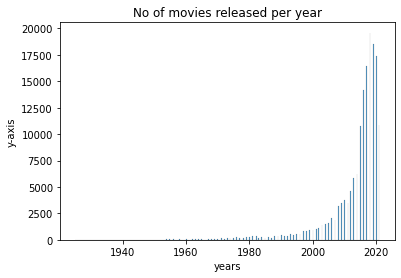

In [61]:
#distplot
sns.histplot(data=df,x='release_year',legend=True)
plt.title('No of movies released per year')
plt.xlabel('years')
plt.ylabel('y-axis')

### 4.2 Bi-Variate and Multi-Variate analysis: 

### The following columns are categorical:<br>
1. type - Movie or TV Show (Bi-variate)
<br><br>
2. Country - We will consider the top 10 countries (Multi-variate)
<br><br>
3. Duration - Movies in mins and TV Shows in seasons (Bi-variate)
<br><br>
4. listed_in - all the categories(kinda genre) of movies and TV Shows (Multi-Variate)
<br><br>
5. Director - Top 10 director names (Multi-Variate)
<br><br>
6. cast - Top 10 cast (Multi-Variate)

In [62]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020.0,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director_null,Ama Qamata,South Africa,"September 24, 2021",2021.0,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


#### Ques 1 : Return top 10 countries with highest number of movies or TV Shows?
Answer : Here we will count movies and TV Shows country wise using group by.

In [63]:
movies_country_wise = df.groupby(['country'])['show_id'].nunique()
top_10_country_movies = movies_country_wise.sort_values(ascending=False).head(5)
top_10_country_movies = top_10_country_movies.reset_index()
top_10_country_movies.rename(columns = {'country':'Countries',
                                        'show_id':'Total_shows_movies'}, inplace = True)
top_10_country_movies

,Countries,Total_shows_movies
0,United States,3211
1,India,1008
2,country_null,831
3,United Kingdom,628
4,Canada,271


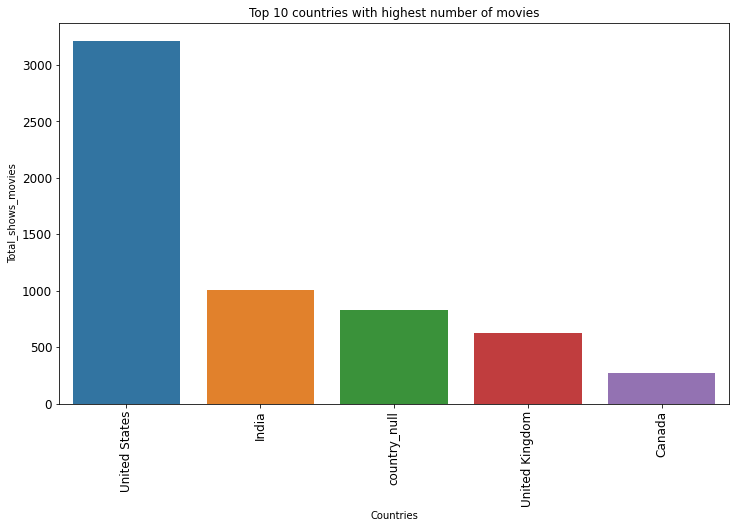

In [64]:
# plots
plt.figure(figsize=(12,7))
sns.barplot(data=top_10_country_movies,x='Countries',y='Total_shows_movies')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 countries with highest number of movies')
plt.show()

#### Ques 2 : Return distribution of movies and TV shows country wise?

In [65]:
movies_country_wise = df.groupby(['country','type'])['show_id'].nunique()
top_10_country_movies = movies_country_wise.sort_values(ascending=False).head(10)
top_10_country_movies = top_10_country_movies.reset_index()
top_10_country_movies.rename(columns = {'country':'Countries',
                                        'show_id':'Total_shows_movies'}, inplace = True)

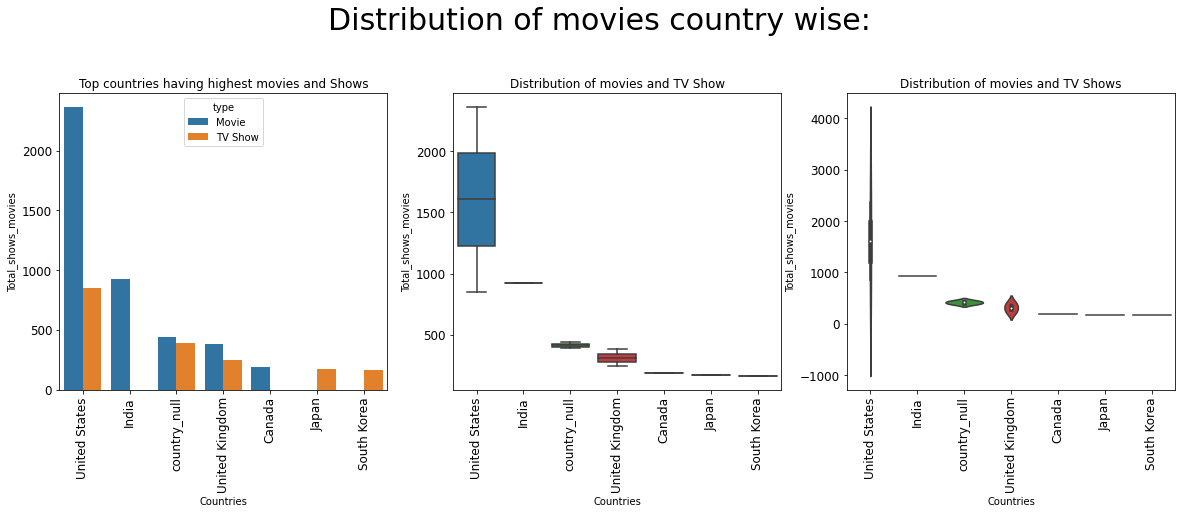

In [66]:
plt.figure(figsize=(20,12)).suptitle('Distribution of movies country wise:',fontsize=30)
# plot - barplot
plt.subplot(2, 3, 1)
sns.barplot(data=top_10_country_movies,x='Countries',y='Total_shows_movies',hue='type')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top countries having highest movies and Shows')


# plot - boxplot
plt.subplot(2, 3, 3)
sns.violinplot(data=top_10_country_movies,x='Countries',y='Total_shows_movies')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of movies and TV Shows')

# plot - violin plot
plt.subplot(2, 3, 2)
sns.boxplot(data=top_10_country_movies,x='Countries',y='Total_shows_movies')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of movies and TV Show')
plt.show()

### Observation : 
<br>
1. Barplot shows the distribution of movies and TV Shows and USA produces maximum number of movies and TV shows.
<br><br>
2. India produces second highest movies but the number of TV Shows are less.
<br><br>
3. We have null_values which is not a country so we will not consider it.
<br> <br>
4. Boxplot and violin plot shows distribution of total of movies and TV shows together and from boxplot we can infer than USA produces roughly about 1700 median(both movies and TV shows).
<br><br>
5. Here the boxplot and violin plots are difficult to analyse but it gives us the good picture of countries producing both movies and TV Shows.

### Ques 3 : Analyse the top 10 genre(listed_in) for both movies and TV Shows?

In [67]:
# seperating the Movie from type:
movies_df = df[df['type']=='Movie']
movies_df = movies_df.groupby(['listed_in','type'])['title'].nunique()
movies_df = movies_df.sort_values(ascending=False).reset_index()
movies_df = movies_df.head(10)

# seperating the TV Shows from type:
TV_Shows_df = df[df['type']=='TV Show']
TV_Shows_df = TV_Shows_df.groupby(['listed_in','type'])['title'].nunique()
TV_Shows_df = TV_Shows_df.sort_values(ascending=False).reset_index()
TV_Shows_df = TV_Shows_df.head(10)


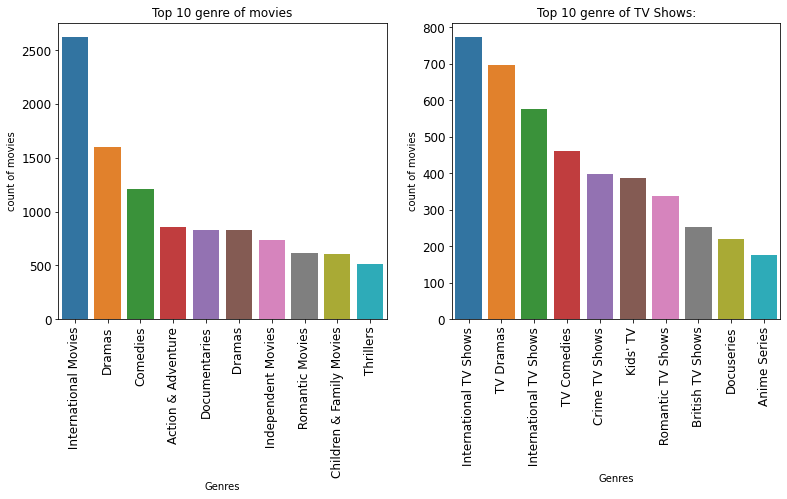

In [68]:
plt.figure(figsize=(20,12))



# plotting the top 10 genre for movies:
plt.subplot(2, 3, 1)
sns.barplot(data=movies_df,x='listed_in',y='title')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 genre of movies')
plt.ylabel('count of movies')
plt.xlabel('Genres')


# plotting the top 10 genre for TV Shows:
plt.subplot(2, 3, 2)
sns.barplot(data=TV_Shows_df,x='listed_in',y='title')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 genre of TV Shows:')
plt.ylabel('count of movies')
plt.xlabel('Genres')
plt.show()

### Observation:
1. Plot 1 : Shows the distribution of movies genre wise and we can see that genre of international Movies is having the most number of movies followed by Dramas and Comedy.
<br><br>
2. Plot 2 : Shows the distribution of TV shows and we could figure out the top categories of TV shows.

In [69]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020.0,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."


In [70]:
movies_df = df[df['type']=='Movie']
movies_df.duration.replace(to_replace='duration_null',value=0,inplace=True)
np.any(movies_df.duration=='duration_null')

False

In [71]:
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020.0,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,country_null,"September 24, 2021",2021.0,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [72]:
movies_df = movies_df.astype({'duration':'int','release_year':'int'})


### 4.3 :  Pairplot and Heatmaps:

### Ques : Find out which all columns are resposible for increasing the duration of movies?

In [73]:
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,country_null,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [74]:
# top 10 countries with highest movies
movies_countries = movies_df.groupby('country')['show_id'].nunique()
movies_countries = movies_countries.sort_values(ascending=False).reset_index().head(5)

# top 10 genre
movies_listed_in = movies_df.groupby('listed_in')['show_id'].nunique()
movies_listed_in = movies_listed_in.sort_values(ascending=False).reset_index().head(5)

# top 10 year of movies
movies_released_year = movies_df.groupby('release_year')['show_id'].nunique()
movies_released_year = movies_released_year.sort_values(ascending=False).reset_index().head(5)


In [75]:
top_10_movies = movies_df.loc[(movies_df['country'].isin(movies_countries['country']))&
                             (movies_df['listed_in'].isin(movies_listed_in['listed_in']))&
                             (movies_df['release_year'].isin(movies_released_year['release_year']))]

In [76]:
top_10_movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Pedro de Echave García,cast_null,country_null,"September 22, 2021",2020,TV-MA,67,Documentaries,Declassified documents reveal the post-WWII li...


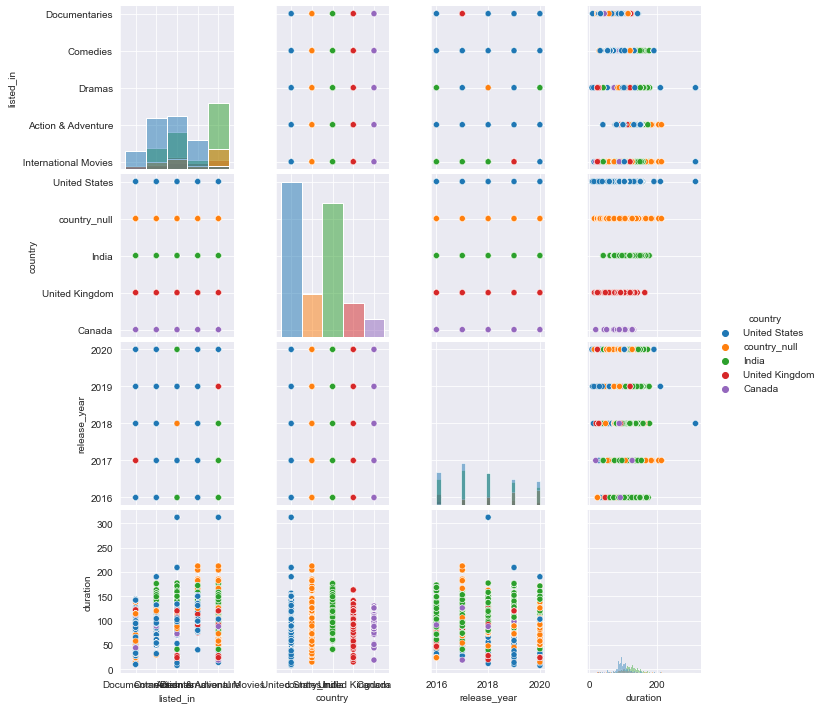

In [77]:
# pairplot
plt.close()
sns.set_style('darkgrid')
sns.pairplot(data=top_10_movies, vars=['listed_in','country','release_year','duration'],
            kind='scatter',plot_kws={'color':'green'},
             diag_kind='hist',hue='country',diag_kws={'color':'red'})


### Observation:

1. Plot 4 : x-axis-->duration,y-axis-->listed_in => Shows that International movies and Action & Adventures have the long duration movies. Documentary movies are basically short in duration.
<br><br>
2. Plot 8 : x-axis-->duration,y-axis-->country => Shows that USA produces movies that have more duration compared to other countries.
<br><br>
3. Plot 12 : x-axis-->duration,y-axis-->release_year => movies produced in these years are having almost same duration.
<br><br>
<b>Note</b>: We can similar analysis with the TV Shows and could figure which all features are affecting the duration of TV Shows.


In [78]:
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_null,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,country_null,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [79]:
df_duration = movies_df[['country','duration']]
df_release_year = movies_df[['release_year','title']]
df_listed_in = movies_df[['listed_in','title']]

In [80]:
df_duration = df_duration.groupby('country')['duration'].mean()
df_duration = df_duration.sort_values(ascending=False).reset_index().head(5)
df_duration = df_duration.set_index('country')

# count of movies per year
df_release_year = df_release_year.groupby('release_year')['title'].nunique()
df_release_year = df_release_year.sort_values(ascending=False).reset_index().head(5)
df_release_year = df_release_year.set_index('release_year')

#
df_listed_in = df_listed_in.groupby('listed_in')['title'].nunique()
df_listed_in = df_listed_in.sort_values(ascending=False).reset_index().head(5)
df_listed_in = df_listed_in.set_index('listed_in')

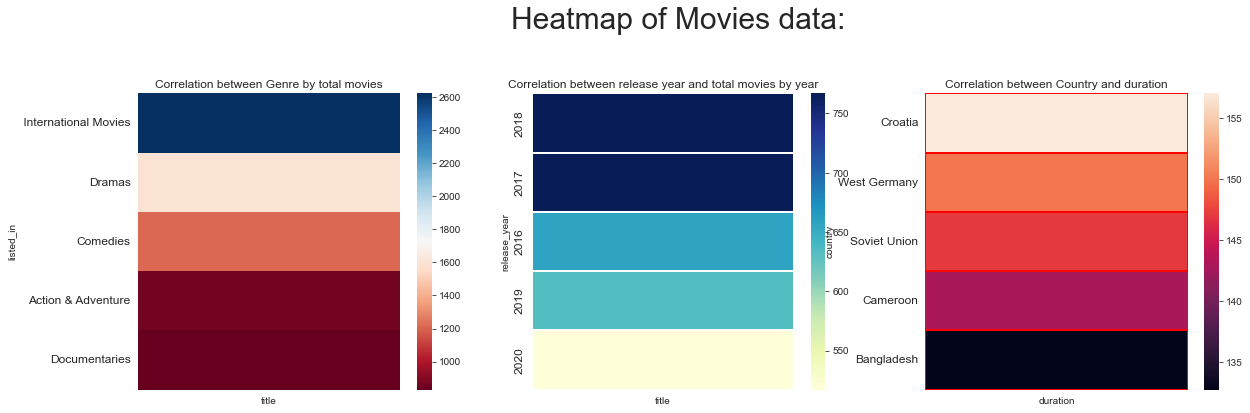

In [81]:
plt.figure(figsize=(20,12)).suptitle('Heatmap of Movies data:',fontsize=30)
# plot - barplot
plt.subplot(2, 3, 1)
sns.heatmap(df_listed_in,cmap='RdBu')
plt.yticks(fontsize=12)
plt.title('Correlation between Genre by total movies')

# plot - boxplot
plt.subplot(2, 3, 3)
sns.heatmap(df_duration,linewidth =.1,linecolor ="red")
plt.yticks(fontsize=12)
plt.title('Correlation between Country and duration')

# plot - violin plot
plt.subplot(2, 3, 2)
sns.heatmap(df_release_year,linewidth =.1,cmap="YlGnBu")
plt.yticks(fontsize=12)
plt.title('Correlation between release year and total movies by year')
plt.show()

### Observation:

 <b>Heatmap 1 </b>: Correlation between genre and total movies, we can see that international movies is dark blue showing that this genre has most number of movies.
<br><br>
<b> Heatmap 2 </b>: Correlation between released_year and the number of movies, we can see that 2018 and 2017 are dark blue which shows that in these two years most of the movies were released.
<br><br>
 <b>Heatmap 3</b> : Correlation between countries and duration of movies, we can see that Croatia has movies which are slightly of longer duration followed by West Germany and Soviet Union.

## Business Insights:

<b>1. Trend of movies and TV Shows over years</b> :  From univariate analysis we can observe that the number of movies are increasing as years are increasing. 
eg: released_year 2000 onwards, movies released shows upward trend.

<b>2. Country with highest Movies and TV Shows</b> : From bivariate analysis we can see that USA produced the highest number of Movies and TV Shows followed by India but India produced only Movies and then followed by UK.

<b>3. Top genre</b> :  We can see that International Movies is the top genre followed by Dramas among Movies and in TV Shows - International TV Shows is the top genre followed by TV Dramas.

<b>4. Duration of Movies </b>: From pairplot we can see that Documentary genre produce less duration movies compared to other genre and international movies have the longer duration.

<b>5. Year with max movies</b> : From heatmap we can see that 2018 and 2017 are the years which have the maximum number of movies followed by 2016,2019 and 2020.

## Recommendations:

1. As we can see that the number of movies and TV Shows are increasing as the years are increasing,netflix should add more data storage servers in the future so that it could provide variety of options to users.
<br><br>
2. As we can see that the top genre is International Movies and International TV Shows in TV Shpws followed by Dramas, netflix should recommend these genre to users by analysing user sentiments.
<br><br>
3. As we can see that the Documentary movies have less duration so logically it will require less storage space and netflix can have less storage facility particularly for this genre.
<br><br>
4. Since USA producing most number of Movies and TV Shows so it gives us a hint that USA might have the more number of users, netflix can provide better subscription facilties to these customers so that it can hold customers.

